In [1]:
from astropy.table import Table
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['text.usetex']=True
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20 


In [2]:
data = Table.read('2017-01-15_galaxy_zoo_ferengi_2_classifications.csv')

In [3]:
len(data)

134535

In [4]:
total_classifications_needed  = 936*8*40
print 'classifications done: {}'.format(len(data))
print 'percentage done: {:.2f}'.format(float(len(data))/total_classifications_needed)
print 'classifications needed: {}'.format(total_classifications_needed - len(data))
print 'days to complete at rate of {} per day: {}'.format(3000,(total_classifications_needed - len(data))/3000)

classifications done: 134535
percentage done: 0.45
classifications needed: 164985
days to complete at rate of 3000 per day: 54


In [6]:
users = set(data['user'])

In [7]:
userlist = list(users)

In [8]:
logged_in_users = [u for u in userlist if 'not-logged-in' not in u]

In [9]:
len(logged_in_users)

3324

In [10]:
all_user_classifications_list = []
logged_in_user_classifications_list = []
for user in userlist:
    this_user_data = data[data['user']==user]
    all_user_classifications_list.append(len(this_user_data))
    if 'not-logged-in' not in user:
        logged_in_user_classifications_list.append(len(this_user_data))

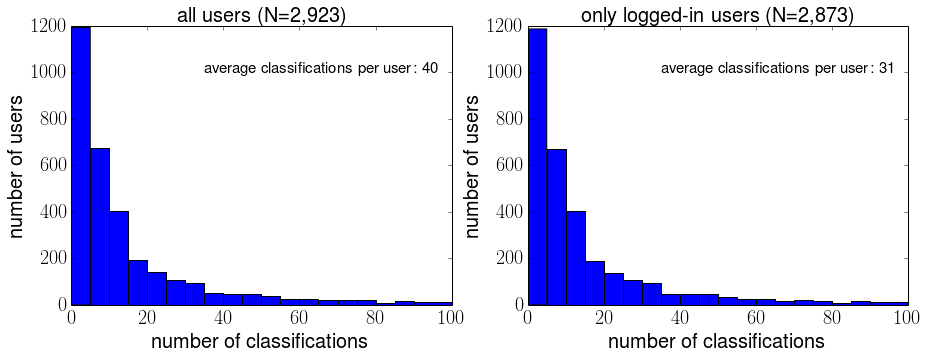

In [11]:
fs = 20
f = plt.figure(figsize=(15,5))
gs=gridspec.GridSpec(1,2)
ax=plt.subplot(gs[0,0])
plt.hist(all_user_classifications_list,range=(0,100),bins=20)
plt.xlabel('number of classifications',fontsize=fs)
plt.ylabel('number of users',fontsize=fs)
plt.title('all users (N=2,923)',fontsize=fs)
ax.text(35,1000,'average classifications per user: {:.0f}'.format(np.average(all_user_classifications_list)),fontsize=15)

ax=plt.subplot(gs[0,1])
plt.hist(logged_in_user_classifications_list,range=(0,100),bins=20)
plt.xlabel('number of classifications',fontsize=fs)
plt.ylabel('number of users',fontsize=fs)
plt.title('only logged-in users (N=2,873)',fontsize=fs)
ax.text(35,1000,'average classifications per user: {:.0f}'.format(np.average(logged_in_user_classifications_list)),fontsize=15)


In [46]:
np.min(all_user_classifications_list)

1

In [12]:
np.max(all_user_classifications_list)

5618

In [13]:
np.average(all_user_classifications_list)

39.874036751630115

In [14]:
for user in userlist:
    this_user_data = data[data['user']==user]
    if len(this_user_data)>3000:
        print user

not-logged-in-0242c210c68e16e3377c5ba05daf3c3c
not-logged-in-21521a088c1a9ee2662875b456bb8490
johnadams231
not-logged-in-cf57ebb4d0a30879dd525aeac87ad839
not-logged-in-2ab33d5da48e46a04e2f07b03d5fb307


In [78]:
classification_dates = [datetime.datetime.strptime(d['created_at'].split(' ')[0],'%Y-%m-%d') for d in data]

In [79]:
classification_dates

[datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 12, 9, 0, 0),
 datetime.datetime(2016, 

In [80]:
dates = list(set(classification_dates))

In [83]:
dates_sorted=sorted(dates)

In [94]:
print dates_sorted[2]
classification_dates.count(dates_sorted[2])

2016-12-11 00:00:00


1957

In [87]:
#classifications_per_day = [classification_dates.count(cd) for cd in classification_dates]
#for some reason this takes a long time... 
classifications_per_day = []
classification_days = []
for date in dates_sorted:
    this_day_classifications = classification_dates.count(date)
    classification_days.append(date)
    classifications_per_day.append(this_day_classifications)

In [98]:
x = np.linspace(1,len(classification_days),len(classification_days))

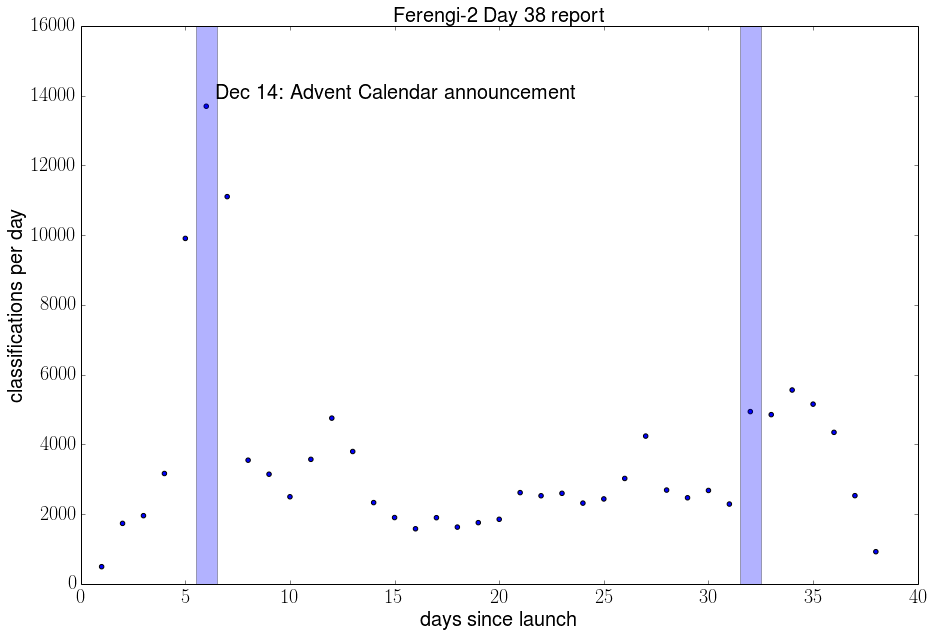

In [127]:
f=plt.figure(figsize=(15,10))
plt.scatter(x,classifications_per_day)
plt.xlim(0,40)
plt.ylim(0,16000)
plt.xlabel('days since launch',fontsize=20)
plt.ylabel('classifications per day',fontsize=20)
plt.axvspan(5.5,6.5,alpha=.3)
plt.axvspan(31.5,32.5,alpha=.3)
f.text(.25,.8,'Dec 14: Advent Calendar announcement',fontsize=20)
plt.title('Ferengi-2 Day 38 report',fontsize=20)
plt.savefig('ferengi2_report.png')

In [120]:
classification_dates.count(classification_days[5])

13697

In [124]:
classification_days[33]

datetime.datetime(2017, 1, 11, 0, 0)

In [126]:
x[32]

33.0